# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

##### Authored by: Rajiv Gaba

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

import os
import random
from random import randint
import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard

import PIL
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input



/Users/RajivGaba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
start_time = datetime.datetime.now()

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

pandas version: 2.2.3
numpy version: 1.26.4
tensorflow version: 2.16.2
matplotlib version: 3.9.4
seaborn version: 0.13.2
PIL version: 11.1.0
keras version: 3.9.0
sklearn version: 1.6.1


Load the dataset.

In [6]:
# dataset_path = "/kaggle/input/cnn-wastemgmt-dataset/data/"

dataset_path = "/Users/RajivGaba/aiml_projects/cnn_assignment/data"

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images

def loadRawImages(inp_path):
    images = []
    labels = []
    # Walk through all subdirectories
    for root, dirs, files in os.walk(inp_path):
        # Skip the root directory itself
        if root == inp_path:
            continue
            
        # Get the label from the directory name
        label = os.path.basename(root)
        
        # Process each file in the directory
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Create full file path
                file_path = os.path.join(root, file)
                images.append(file_path)
                labels.append(label)
                
    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

In [8]:
# Get the images and their labels
image_paths, labels = loadRawImages(dataset_path)

# Print some information to verify the loading
print(f"Total number of images found: {len(image_paths)}")
print(f"Total number of labels found: {len(labels)}")
print("\nUnique labels:", set(labels))

Total number of images found: 7625
Total number of labels found: 7625

Unique labels: {'Plastic', 'Other', 'Paper', 'Glass', 'Metal', 'Food_Waste', 'Cardboard'}


In [9]:
def preprocess_image(image_path, target_size=(256, 256)):
    # Load and resize image
    img = PIL.Image.open(image_path)
    img = img.resize(target_size)  # Uncommented to resize the image
    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0
    return img_array

# Convert all images to numpy arrays
X = []
y = []

# Process each image
for image_path, label in zip(image_paths, labels):
    try:
        # Preprocess the image
        img_array = preprocess_image(image_path)
        X.append(img_array)
        y.append(label)
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shapes to verify
print("Image array shape:", X.shape)
print("Labels array shape:", y.shape)

Image array shape: (7625, 256, 256, 3)
Labels array shape: (7625,)


Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [10]:
# Visualize some of the images
def show_images_with_labels(images, labels, num_images):
    plt.figure(figsize=(15, 15))
    indices = list(range(len(images)))
    random.shuffle(indices)
    for i in range(num_images):
        idx = indices[i]
        random_integer = randint(1, num_images)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()

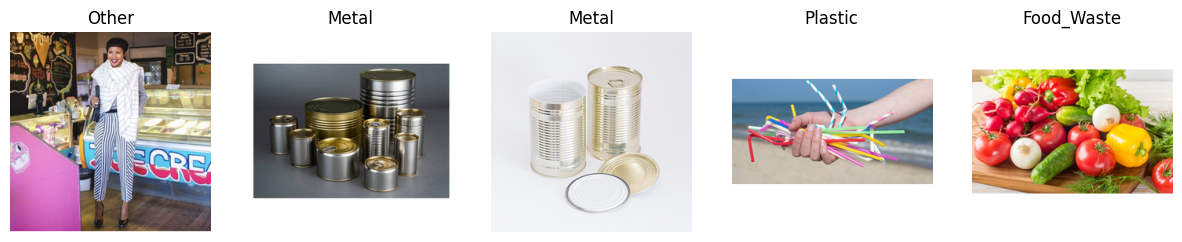

In [11]:
# see random images 

show_images_with_labels(X,y ,5)

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

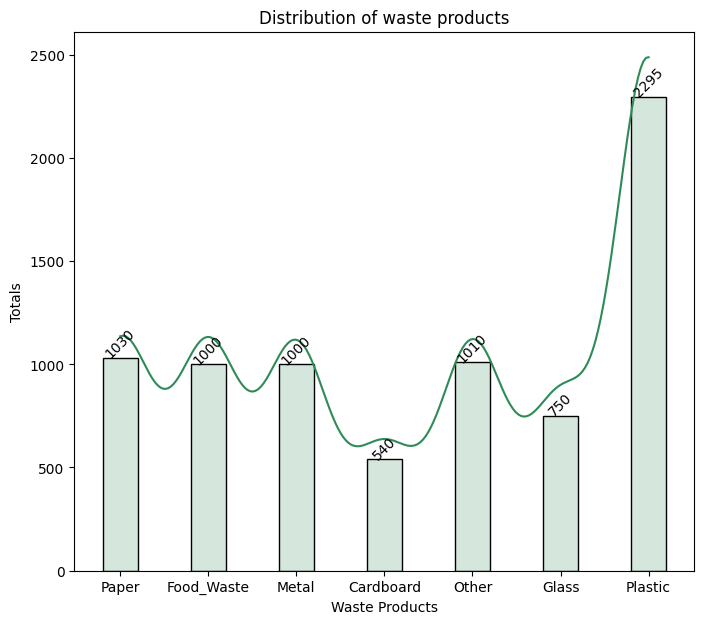

In [12]:
# Visualise Data Distribution

plt.figure(figsize=[8,7])
ax = sns.histplot(data=y, bins=7, color="seagreen", alpha=0.2, shrink=0.4, legend=True, kde=True)
# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 1.5, 
            f'{int(height)}', 
            ha="center", 
            rotation=45
           ) 
plt.title("Distribution of waste products")
plt.xlabel("Waste Products")
plt.ylabel("Totals")
plt.show()

The number of images in the dataset pertaining to plastic class is highest. This could probably lead to class imbalance during model building

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

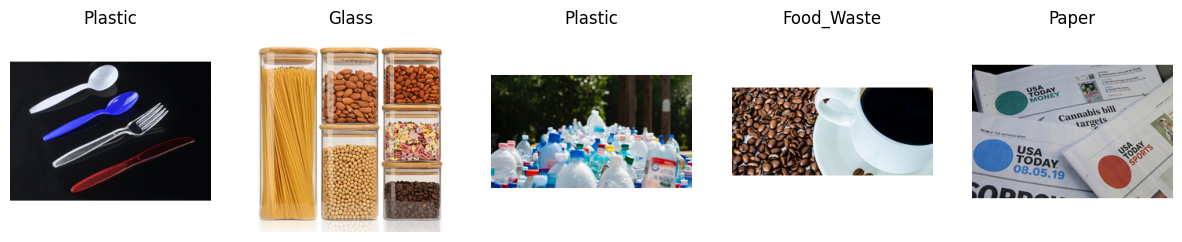

In [13]:
# Visualise Sample Images (across different labels)

show_images_with_labels(X, y ,5)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [14]:
# Find the smallest and largest image dimensions from the data set

width_list , height_list  = [] , []
for i in range(0, len(X)):
    w, h ,c = X[i].shape
    width_list.append(w)
    height_list.append(h)

width_list.sort()
height_list.sort()

width_list[0], width_list[-1], height_list[0], height_list[-1]

(256, 256, 256, 256)

In [15]:
# Resize the image dimensions



### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [16]:
# Encode the labels suitably

le = LabelEncoder()
y = le.fit_transform(y)
y

array([5, 5, 5, ..., 6, 6, 6])

In [17]:
# print class mapping
print("\nClass mapping:\n")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")


Class mapping:

Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [18]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56, stratify=y)

# Print the shapes of training and test sets
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training set shape: (5337, 256, 256, 3)
Training labels shape: (5337,)
Test set shape: (2288, 256, 256, 3)
Test labels shape: (2288,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [19]:
# Defining the parameters
batch_size = 32
num_classes = 7
epochs = 10

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [20]:
# define model configuration

conf =[
    { "name" : "conf1", "filters" : 32, "kernel_size" : (3,3), "activation" : "relu", "pool_size" : (2,2), "dropout_rate" : 0.3, "activation": "relu", "conv_layers" : 3 , "batch_norm": "N" }
    ]

'''
revised_conf = [
        { "name": "conf3_updated_1", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 3, "batch_norm": "N" },
        { "name": "conf3_updated_2", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 2, "batch_norm": "N" },
        { "name": "conf3_updated_3", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 1, "batch_norm": "N" }
]


revised_conf_2 = [
        { "name": "conf3_updated_1", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 3, "batch_norm": "N" },
        { "name": "conf3_updated_2", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 2, "batch_norm": "N" },
        { "name": "conf3_updated_3", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 1, "batch_norm": "N" }
]

'''


'\nrevised_conf = [\n        { "name": "conf3_updated_1", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 3, "batch_norm": "N" },\n        { "name": "conf3_updated_2", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 2, "batch_norm": "N" },\n        { "name": "conf3_updated_3", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 1, "batch_norm": "N" }\n]\n\n\nrevised_conf_2 = [\n        { "name": "conf3_updated_1", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 3, "batch_norm": "N" },\n        { "name": "conf3_updated_2", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 2, "batch_norm": "N" },\n        { "name": "conf3_updated_3", "filters": 64, "kernel_size": (

In [21]:
# define a method/function for model creation

def create_model(conf, input_shape):
    model = Sequential()
    for i in range(conf["conv_layers"]):
        model.add(Conv2D(conf["filters"], conf["kernel_size"], activation=conf["activation"], padding='same', input_shape=(width_list[0], width_list[0], 3) ))
        if conf["batch_norm"] == "Y":
            model.add(BatchNormalization())
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=conf["pool_size"]))
        model.add(Dropout(conf["dropout_rate"]))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(conf["dropout_rate"]))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model 

In [22]:
# compile the model
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

In [23]:
# Training

def model_training(config, X_train, y_train, epochs, batch_size, X_test, y_test):
    history_dict = {}
    for config in config:
        print(f"\nTraining with configuration: {config['name']}")
        
        # Create the model
        model = create_model(config, input_shape=(width_list[0], width_list[0], 3))
        
        # Compile the model
        model = compile_model(model)
        
        # Print the model summary
        print(config)
        model.summary()
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

        history_dict[config['name']] = history.history

        # save the models to the disk
        model.save(config["name"] + "_model.keras")
    return history_dict, model

    

In [24]:
# train the model

model_history, model = model_training(config=conf, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history


Training with configuration: conf1


2025-04-17 14:55:54.608611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-04-17 14:55:54.609766: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-04-17 14:55:54.609774: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-04-17 14:55:54.610016: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 14:55:54.610036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{'name': 'conf1', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (2, 2), 'dropout_rate': 0.3, 'conv_layers': 3, 'batch_norm': 'N'}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,095 (64.09 MB)

 Trainable params: 16,800,903 (64.09 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10


2025-04-17 14:56:37.285189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 270ms/step - accuracy: 0.2228 - loss: 65.6857 - val_accuracy: 0.1346 - val_loss: 24.1085
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 274ms/step - accuracy: 0.3164 - loss: 39.7687 - val_accuracy: 0.2483 - val_loss: 19.5434
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.3601 - loss: 35.5240 - val_accuracy: 0.3160 - val_loss: 21.3192
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 288ms/step - accuracy: 0.3566 - loss: 32.2122 - val_accuracy: 0.4030 - val_loss: 19.5976
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 283ms/step - accuracy: 0.4145 - loss: 31.7798 - val_accuracy: 0.2806 - val_loss: 43.6823
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 278ms/step - accuracy: 0.4362 - loss: 27.4553 - val_accuracy: 0.2365 - val_loss: 30.6793
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.4647 - loss: 23.6289 - val_accuracy: 0.3641 - val_loss: 20.1092
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 274ms/step - accuracy: 0.4743 - loss

{'conf1': {'accuracy': [0.2570732533931732,
   0.31965523958206177,
   0.3550683856010437,
   0.36687278747558594,
   0.4159640371799469,
   0.43114107847213745,
   0.4594341516494751,
   0.47311222553253174,
   0.48716506361961365,
   0.5000936985015869],
  'loss': [52.867061614990234,
   39.58381271362305,
   36.04723358154297,
   34.43122863769531,
   31.70309066772461,
   28.026220321655273,
   23.667329788208008,
   21.498165130615234,
   20.518421173095703,
   19.28699493408203],
  'val_accuracy': [0.13461539149284363,
   0.2482517510652542,
   0.3159964978694916,
   0.4029720425605774,
   0.2805944085121155,
   0.23645104467868805,
   0.36407342553138733,
   0.44274476170539856,
   0.4449300765991211,
   0.40646854043006897],
  'val_loss': [24.108497619628906,
   19.543367385864258,
   21.319189071655273,
   19.597551345825195,
   43.68225860595703,
   30.679298400878906,
   20.10919761657715,
   22.85997772216797,
   20.06256675720215,
   26.85829734802246]}}

In [25]:
'''

model_history_updated = model_training(config=revised_conf, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_updated
model_history_updated_2 = model_training(config=revised_conf_2, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_updated_2

'''

'\n\nmodel_history_updated = model_training(config=revised_conf, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_updated\nmodel_history_updated_2 = model_training(config=revised_conf_2, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_updated_2\n\n'

Use appropriate metrics and callbacks as needed.

In [26]:
# load model
model = keras.models.load_model("conf1_model.keras")

# deploy early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.5336 - loss: 19.5532 - val_accuracy: 0.3934 - val_loss: 23.4263
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.5647 - loss: 19.0457 - val_accuracy: 0.4934 - val_loss: 20.3400
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.5735 - loss: 17.5535 - val_accuracy: 0.4113 - val_loss: 34.2184
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 270ms/step - accuracy: 0.5748 - loss: 22.5360 - val_accuracy: 0.4519 - val_loss: 26.8439
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 273ms/step - accuracy: 0.6182 - loss: 19.4404 - val_accuracy: 0.4296 - val_loss: 36.1177


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [27]:
# Evaluate on the test set; display suitable metrics

accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy: {accuracy:.2f}")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Test accuracy: 0.49
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
              precision    recall  f1-score   support

   Cardboard       0.43      0.81      0.56       162
  Food_Waste       0.65      0.40      0.49       300
       Glass       0.41      0.41      0.41       225
       Metal       0.62      0.33      0.43       300
       Other       0.41      0.29      0.34       303
       Paper       0.60      0.34      0.43       309
     Plastic       0.48      0.72      0.58       689

    accuracy                           0.49      2288
   macro avg       0.51      0.47      0.46      2288
weighted avg       0.52      0.49      0.48      2288



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [28]:
# Define augmentation steps to augment images
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
    ])


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [29]:
# Create a function to augment the images
def augmented_images(images):
    augmented_images = []
    for img in images:
        img = tf.expand_dims(img, axis=0)
        augmented_img = data_augmentation(img)
        augmented_images.append(augmented_img[0].numpy())  
    return np.array(augmented_images)

In [30]:
# Create the augmented training dataset
X_train_augmented = augmented_images(X_train)
# X_train_augmented = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train, y_train), axis=0)


##### **4.1.2**

Train the model on the new augmented dataset.

In [31]:
# Train the model using augmented images

augmented_model_history, augmented_model = model_training(config=conf, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
print(augmented_model_history)


Training with configuration: conf1
{'name': 'conf1', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (2, 2), 'dropout_rate': 0.3, 'conv_layers': 3, 'batch_norm': 'N'}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,095 (64.09 MB)

 Trainable params: 16,800,903 (64.09 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.2112 - loss: 85.0459 - val_accuracy: 0.1167 - val_loss: 37.5482
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 276ms/step - accuracy: 0.3005 - loss: 51.3686 - val_accuracy: 0.2102 - val_loss: 41.0406
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 289ms/step - accuracy: 0.3227 - loss: 46.3681 - val_accuracy: 0.2308 - val_loss: 42.0111
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 285ms/step - accuracy: 0.3798 - loss: 35.9142 - val_accuracy: 0.2566 - val_loss: 31.3486
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 275ms/step - accuracy: 0.3885 - loss: 34.7427 - val_accuracy: 0.4314 - val_loss: 16.2695
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 279ms/step - accuracy: 0.4172 - loss: 27.2666 - val_accuracy: 0.3116 - val_loss: 23.5548
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.4467 - loss: 24.9104 - val_accuracy: 0.3746 - val_loss: 20.3779
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 46s 274ms/step - accuracy: 0.

In [32]:
# Model evaluation after augmentation 

accuracy = augmented_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy: {accuracy:.2f}")
y_pred_augmented = augmented_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_augmented, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

Test accuracy: 0.34
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
              precision    recall  f1-score   support

   Cardboard       0.44      0.64      0.52       162
  Food_Waste       0.77      0.12      0.21       300
       Glass       0.38      0.17      0.24       225
       Metal       0.58      0.29      0.38       300
       Other       0.19      0.81      0.31       303
       Paper       0.38      0.14      0.21       309
     Plastic       0.67      0.32      0.43       689

    accuracy                           0.34      2288
   macro avg       0.49      0.36      0.33      2288
weighted avg       0.52      0.34      0.34      2288



In [33]:

# under sample the class with label plastic

plastic_indices = np.where(y == 6)[0]
non_plastic_indices = np.where(y != 6)[0]

print(f"non-plastic images: {len(non_plastic_indices)}")
print(f"plastic images: {len(plastic_indices)}")

# select 1000 random indexes from plastic_indices
plastic_indices = np.random.choice(plastic_indices, 1000, replace=False)

# combine the two arrays
combined_indices = np.concatenate((plastic_indices, non_plastic_indices))

# create new X and y arrays
X_under_sampled = X[combined_indices]
y_under_sampled = y[combined_indices]

# Encode the labels
y_under_sampled = le.fit_transform(y_under_sampled)



non-plastic images: 5330
plastic images: 2295


In [34]:
# Split the data into training and test sets
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_under_sampled, y_under_sampled, test_size=0.3, random_state=56, stratify=y_under_sampled)

# Convert labels to categorical
y_train_us = to_categorical(y_train_us, num_classes=num_classes)
y_test_us = to_categorical(y_test_us, num_classes=num_classes)

# Train the model with under-sampled data
under_sampled_model_history, under_sampled_model = model_training(config=conf, X_train=X_train_us, y_train=y_train_us, epochs=epochs, batch_size=batch_size, X_test=X_test_us, y_test=y_test_us)

# Model evaluation after under-sampling
accuracy = under_sampled_model.evaluate(X_test_us, y_test_us, verbose=0)[1]
print(f"Test accuracy: {accuracy:.2f}")



Training with configuration: conf1
{'name': 'conf1', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (2, 2), 'dropout_rate': 0.3, 'conv_layers': 3, 'batch_norm': 'N'}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,095 (64.09 MB)

 Trainable params: 16,800,903 (64.09 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 43s 268ms/step - accuracy: 0.2270 - loss: 69.0448 - val_accuracy: 0.1675 - val_loss: 13.5836
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 36s 255ms/step - accuracy: 0.2779 - loss: 48.9815 - val_accuracy: 0.1943 - val_loss: 26.8443
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 36s 254ms/step - accuracy: 0.3049 - loss: 43.3700 - val_accuracy: 0.3202 - val_loss: 22.0757
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.3154 - loss: 42.9864 - val_accuracy: 0.3102 - val_loss: 26.7190
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - accuracy: 0.3745 - loss: 34.9738 - val_accuracy: 0.3275 - val_loss: 41.4818
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 35s 250ms/step - accuracy: 0.3919 - loss: 33.1032 - val_accuracy: 0.3960 - val_loss: 26.2470
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - accuracy: 0.4217 - loss: 30.2536 - val_accuracy: 0.3375 - val_loss: 37.5051
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - accuracy: 0.

In [35]:
# Use a pre-trained model VGG16 with keras

from tensorflow.keras.applications import VGG16


# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 83s 491ms/step - accuracy: 0.2568 - loss: 25.5743 - val_accuracy: 0.5896 - val_loss: 6.0326
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 425ms/step - accuracy: 0.4477 - loss: 15.2362 - val_accuracy: 0.6718 - val_loss: 4.5630
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 423ms/step - accuracy: 0.5537 - loss: 10.0055 - val_accuracy: 0.6801 - val_loss: 4.9342
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 425ms/step - accuracy: 0.6648 - loss: 6.1705 - val_accuracy: 0.7570 - val_loss: 2.9051
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 427ms/step - accuracy: 0.7210 - loss: 4.6072 - val_accuracy: 0.7177 - val_loss: 3.5594
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 423ms/step - accuracy: 0.7494 - loss: 3.5934 - val_accuracy: 0.7911 - val_loss: 2.4939
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 424ms/step - accuracy: 0.7782 - loss: 2.8168 - val_accuracy: 0.7544 - val_loss: 3.2013
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 71s 424ms/step - accuracy: 0.7971 - loss

In [37]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
y = np.array(y)
print(classification_report(y_true, y_pred_classes))

72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       162
           1       0.79      0.78      0.79       300
           2       0.76      0.85      0.80       225
           3       0.94      0.72      0.82       300
           4       0.80      0.77      0.78       303
           5       0.74      0.72      0.73       309
           6       0.75      0.87      0.81       689

    accuracy                           0.79      2288
   macro avg       0.82      0.78      0.80      2288
weighted avg       0.80      0.79      0.79      2288



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

#### Report your findings about the data

- The images given in the dataset belong to 7 classes.

- The number of images of each class is not balanced. 

- The number of images pertaining to plastic are more than 2x of the volume of other classes.

- This distribution could potentially lead to class imbalance. 


#### Report model training results

- Multiple models were tried by using different number of 
    - Convolutional layers - 2, 3, 4
    - Batch sizes - 32, 64
    - Kernel size - (3, 3), (5, 5)
    - Batch normalization - On/Off
    - Drop out rate - 0.2, 0.3, 0.4
The best accuracy and validation accuracy was received with the model finalized above. 

- Model with 64 and 128 filters resulted in low accuracy however loss in training and test data with minimal with 64 filters
- Batch normalization did not produce better accuracy
- Inclusion of Dropout has made the model better
- Early stopping stopped at 4 epochs
- Image augmentation using keras has improved the accuracy rates of the model
- Usage of pre-trained model VGG16 has improved the model accuracy significantly